# Empirical exploration of linear classifiers

In this lab session we are going to explore binary classification with 2 linear classifiers:

### The Rosenblatt perceptron (1958)
<img src="perceptron_a.png" alt="perceptron unit" style="width: 200px;"/>

The perceptron algorithm was proposed by Rosenblatt in 1958. It is inspired by the biological neuron cell. The perceptron is described by:
- Input: $\mathbf{x}=(x_1,\ldots,x_d)\in\mathbb{R}^d$ 
- Output: $t\in\{-1,1\}$
- Parameters: $\mathbf{w}=(w_1,\ldots,w_d)\in\mathbb{R}^d$ and $w_0\in\mathbb{R}$
- 2 steps:
  + integration: $f(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} + w_0 = W_0 + \sum_{r=1}^d w_r x_r$
  + transfer: $g\circ f(\mathbf{x}) = \textrm{sign}(f(\mathbf{x}))$

The perceptron training algorithm goes as follows:
- Input: A training set $S = \{(\mathbf{x}_1, t_1), \ldots,(\mathbf{x}_m, t_m)\}$
- Initialization: $l=0$, $\mathbf{w}^{(l)}=(0,\ldots,0), \> w_0^{(l)}=0$
- Until convergence or reaching a specified l=L:
  + if $\exists i\in\{1,\ldots,m\}\quad s.t.\quad (\mathbf{w}^{(l)} \cdot \mathbf{x}_i + w_0^{(l)}) t_i \leq 0$ then
  + Update: $\mathbf{w}^{(l+1)}=\mathbf{w}^{(l)}+t_i\mathbf{x}_i$ and $w_0^{(l+1)}=w_0^{(l)}+t_i$

In the separable case the perceptron algorithm is guarantee to converge. In the non-separable case one has to set a maximal number of iterations (to perform early stopping).

The perceptron returns a linear classifier that divides the domain in two halfspaces along the affine boundary with equation $f(\mathbf{x})=\mathbf{w}\cdot \mathbf{x} + w_0 = 0$. 


### Logistic regression
The *sigmoid* function $\sigma:\mathbb{R}\rightarrow ]0,1[$ is defined by: $$\sigma(z)=\frac{1}{1+e^{-z}}$$

In the logistic regression model we learn an hypothesis of the form: $$h(\mathbf{x})=\sigma(\mathbf{w}\cdot \mathbf{x}+w_0)$$ which can be interpreted as the *probability* that $\mathbf{x}$ is labeled 1, 
$$\sigma(\mathbf{w}\cdot \mathbf{x}+w_0) = P(y=1|\mathbf{x}).$$ 

The maximum likelihood estimates of $\mathbf{w}, w_0$ can be obtained with the Iterative reweighted least squares (IRLS) algorithm (see Bishop p. 207)



In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt

In [2]:
class Perceptron:
    def __init__(self, max_iter=10):
        self.max_iter = max_iter
        self.weights = np.zeros(2)
        self.bias = 0
        self.dim = -1
    
    def fit(self,X, y):
        "Assumes X is a mxdim matrix and y is a vector of m values in {-1,1}"        
        # TO BE COMPLETED
        
    def predict(self,X):
        "Assumes the model was fitted a first time"
        return np.sign(self.weights.dot(X.transpose())+self.bias)

In [3]:
class Logistic_Regression:
    def __init__(self, max_iter=50, eps_conv=1e-1):
        self.max_iter = max_iter
        self.eps_conv = eps_conv # If too small risk of breaking
        self.weights = np.zeros(2) 
        self.bias = np.zeros(1)
        self.dim = -1
    
    def fit(self,X, y):
        "Assumes X is a mxdim matrix and y is a vector of m values in {0,1}"
        
        m = X.shape[0]
        dim = X.shape[1]
        self.dim = dim
        #initialisation : 1 iteration of IRLS algorithm
        w = np.zeros(dim)
        w_old = w
        y_pred = 1/2*np.ones((m,))
        R = np.diag(y_pred*(1-y_pred))   # diag(y_n(1-y_n))
        z = X.dot(w_old)-la.inv(R).dot(y_pred-y)
        w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)

        # Newton-Raphson algorithm 
        Niter = 1
        while ( (la.norm(w-w_old)/la.norm(w)>self.eps_conv) and (Niter<self.max_iter) ):
            Niter = Niter+1
            y_pred = 1/(1+np.exp(-X.dot(w)))
            R = np.diag(y_pred*(1-y_pred))  
            w_old = w
            z = X.dot(w_old)-la.inv(R).dot(y_pred-y)
            w = la.inv(X.T.dot(R).dot(X)).dot(X.T).dot(R).dot(z)
        print("Solution found after", Niter, "iterations.")
        self.weights = w
        
    def predict_proba(self,X):
        "Returns the probability of class 1 for each example. Assumes the model was fitted a first time"
        proba = 1/(1+np.exp(-X.dot(w))) 
        return proba 
    
    def predict(self,X):
        "Returns the predicted label for each example. Assumes the model was fitted a first time"
         # TO BE COMPLETED

## iris Data
![3 differents iris species](./iris-machinelearning.png)

### Load the data
It is a classical toy example, hence it is included in scikit-learn package.

In [4]:
from sklearn import datasets
iris = datasets.load_iris()

iris is a dictionary with the following keys:

In [5]:
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [6]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [7]:
import pandas as pd
X = pd.DataFrame(iris.data, columns=['sepal length','sepal width', 'petal length','petal width'])
y = pd.Series(iris.target)

In [8]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

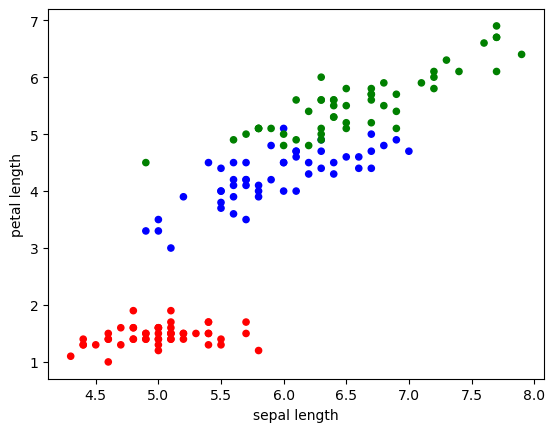

In [10]:
%matplotlib inline
col = {0:"r", 1:"b", 2:"g"}
X.plot.scatter(x="sepal length", y="petal length", c=[col[e] for e in y])
plt.show()

## Questions
> ### Questions:
> 0. Code the perceptron algorithm defined above in the python class below. 
> 1. Modify the fit method of the Logistic_Regression class in order for it to fit also a bias $w_0$ parameter. (HINT: np.hstack and np.ones might be very handy)
> 1. Modify the predict_proba method accordingly and complete the predict method.  
> 1. What is the input domain of the Iris dataset?
> 1. Consider only 2 dimensions (e.g. 'sepal width', 'petal length'): visualise the dataset and the classes
> 1. Recode the classes to get a binary classification problem :
>    * Iris setosa : Class 2
>    * Iris Versicolor & Iris Virginica : Class 1
> 1. Use the coded perceptron and logistic regression to separate the 2 classes Compute the empirical and generalization errors. Visualize the decision functions (use the weights $w$). Comment.
> 1. Recode the classes
>    * Iris Virginica : Class 2
>    * Iris Setosa & Iris Versicolor : Class 1
>    and repeat the previous question for this classification problem. Comment.
> 1. Compare the time complexity of one step of each algorithm. 
> 1. Upload the eggyoke datasets. Use the perceptron and the logistic regression algorithms to solve the classification problem. Compute the empirical and generalization errors. Visualize the decision function (use the weights $w$). What happens? What could be done?

### Question 0

In [11]:
class Perceptron:
    def __init__(self, max_iter=50):
        self.max_iter = max_iter
        self.weights = None
        self.bias = 0
        self.dim = -1
    
    def fit(self, X, y):
        """
        X: m × d matrix
        y: vector of m labels in {−1, 1}
        """
        m, dim = X.shape
        self.dim = dim

        # Initialize weights
        self.weights = np.zeros(dim)
        self.bias = 0

        # Perceptron iterations
        for it in range(self.max_iter):
            error_occurred = False
            
            for (_, xi), ti in zip(X.iterrows(), y):
                # Misclassified if t*(w*x + b) <= 0
                if ti * (np.dot(self.weights, xi) + self.bias) <= 0:
                    self.weights += ti * xi
                    self.bias += ti
                    error_occurred = True
            
            if not error_occurred:
                break  # converged

        print("Solution found after", it, "iterations.")
    
    def predict(self, X):
        return np.sign(self.weights @ X.T + self.bias)

### Question 1-2

In [12]:
class Logistic_Regression:
    def __init__(self, max_iter=50, eps_conv=1e-1):
        self.max_iter = max_iter
        self.eps_conv = eps_conv
        self.weights = None  # We include the bias in the weights vector
        self.dim = -1
    
    def fit(self, X, y):
        """
        X: m × d matrix
        y: vector of m labels in {−1, 1}
        """
        y = np.where(y == 1, 1, 0)
        m, dim = X.shape
        self.dim = dim

        # Augment with 1s for bias
        X_aug = np.hstack((np.ones((m, 1)), X))

        # Initialize weights (dim + 1 to take bias into account)
        self.weights = np.zeros(dim + 1)
        
        w_old = self.weights
        y_pred = 1/2 * np.ones((m,))
        R = np.diag(y_pred * (1 - y_pred))  # diag(y_n(1-y_n))
        z = X_aug.dot(w_old) - la.inv(R).dot(y_pred - y)
        self.weights = la.inv(X_aug.T.dot(R).dot(X_aug)).dot(X_aug.T).dot(R).dot(z)

        # Newton-Raphson algorithm 
        Niter = 1
        while ((la.norm(self.weights - w_old) / la.norm(self.weights) > self.eps_conv) and (Niter < self.max_iter)):
            Niter = Niter + 1
            y_pred = 1/(1 + np.exp(-X_aug.dot(self.weights)))
            R = np.diag(y_pred * (1 - y_pred))  
            w_old = self.weights
            z = X_aug.dot(w_old) - la.inv(R).dot(y_pred - y)
            self.weights = la.inv(X_aug.T.dot(R).dot(X_aug)).dot(X_aug.T).dot(R).dot(z)
        print("Solution found after", Niter, "iterations.")
        
    def predict_proba(self, X):
        "Returns the probability of class 1 for each example. Assumes the model was fitted a first time"
        m = X.shape[0]
        X_aug = np.hstack((np.ones((m, 1)), X))
        return 1/(1 + np.exp(-(X_aug @ self.weights)))
    
    def predict(self, X):
        "Returns the predicted label for each example. Assumes the model was fitted a first time"
        return np.where(self.predict_proba(X) >= 0.5, 1, -1)

### Question 3

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
The Iris dataset has 4 real-valued input features:
- sepal length (cm)
- sepal width (cm)
- petal length (cm)
- petal width (cm)

Thus, the input domain is:
$$
X \subset \mathbb{R}^4.
$$
</div>

### Question 4

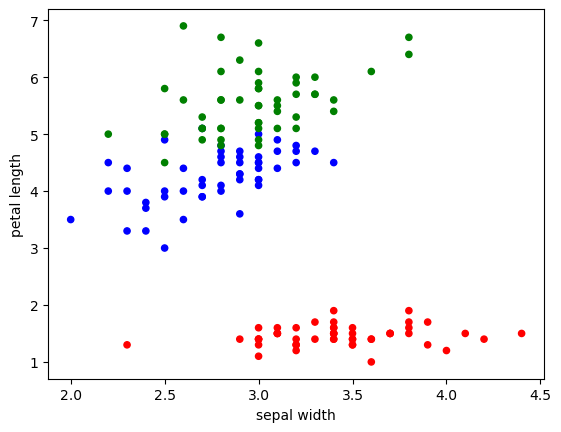

In [13]:
col = {0: "r", 1: "b", 2: "g"}
X.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y])
plt.show()

In [14]:
# For further questions:
X_2D = pd.DataFrame(X[["sepal width", "petal length"]])
X_2D["sepal width"] = X["sepal width"]
X_2D["petal length"] = X["petal length"]
X_2D.head()

,sepal width,petal length
0,3.5,1.4
1,3.0,1.4
2,3.2,1.3
3,3.1,1.5
4,3.6,1.4


### Question 5

In [15]:
# Classes:
# - Iris-Setosa - 0
# - Iris-Versicolour - 1
# - Iris-Virginica - 2
y_setosa = np.where(iris.target == 0, 1, -1)  # setosa=1

### Question 6

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_2D, y_setosa, test_size=0.2, shuffle=True, random_state=42)

#### Perceptron

In [18]:
perc = Perceptron(max_iter=20)
perc.fit(X_train, y_train)

Solution found after 1 iterations.


In [19]:
perc.weights

sepal width     4.9
petal length   -5.3
Name: 22, dtype: float64

In [20]:
perc_empirical_error = mean_squared_error(perc.predict(X_train), y_train)
perc_generalization_error = mean_squared_error(perc.predict(X_test), y_test)
print("Perceptron empirical error:", perc_empirical_error)
print("Perceptron generalization error:", perc_generalization_error)

Perceptron empirical error: 0.0
Perceptron generalization error: 0.0


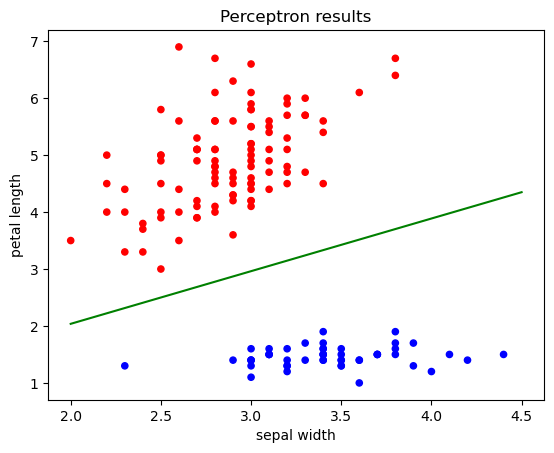

In [21]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_2D.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_setosa])
ax.set_title("Perceptron results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(perc.bias + perc.weights.iloc[0] * x1) / perc.weights.iloc[1]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
This is a separable case, so the model easily finds a separating line, and the error is 0 on both the training and test sets. Since in this case we use only two parameters for training, the decision boundary is defined by the equation:
$$
w_0 x_0 + w_1 x_1 + b = 0.
$$
</div>

#### Logistic regression

In [22]:
logreg = Logistic_Regression(max_iter=20)
logreg.fit(X_train, y_train)

Solution found after 16 iterations.


In [23]:
logreg.weights

array([  8.13966795,  10.1679999 , -14.99464407])

In [24]:
logreg_empirical_error = mean_squared_error(logreg.predict(X_train), y_train)
logreg_generalization_error = mean_squared_error(logreg.predict(X_test), y_test)
print("Logistic regression empirical error:", logreg_empirical_error)
print("Logistic regression generalization error:", logreg_generalization_error)

Logistic regression empirical error: 0.0
Logistic regression generalization error: 0.0


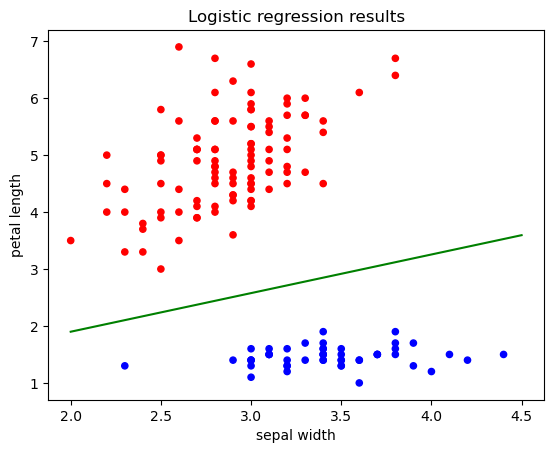

In [25]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_2D.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_setosa])
ax.set_title("Logistic regression results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(logreg.weights[0] + logreg.weights[1] * x1) / logreg.weights[2]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
This is a separable case, so the model easily finds a separating line, and the error is 0 on both the training and test sets. Since in this case we use only two parameters for training, the decision boundary is defined by the equation:
$$
w_0 + w_1 x_1 + w_2 x_2 = 0.
$$
</div>

### Question 7

In [26]:
y_virginica = np.where(iris.target == 2, 1, -1)  # virginica=1

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_2D, y_virginica, test_size=0.2, shuffle=True, random_state=42)

#### Perceptron

In [28]:
perc = Perceptron(max_iter=30)
perc.fit(X_train, y_train)

Solution found after 29 iterations.


In [29]:
perc.weights

sepal width    -41.4
petal length    33.8
Name: 22, dtype: float64

In [30]:
perc_empirical_error = mean_squared_error(perc.predict(X_train), y_train)
perc_generalization_error = mean_squared_error(perc.predict(X_test), y_test)
print("Perceptron empirical error:", perc_empirical_error)
print("Perceptron generalization error:", perc_generalization_error)

Perceptron empirical error: 0.23333333333333334
Perceptron generalization error: 0.5333333333333333


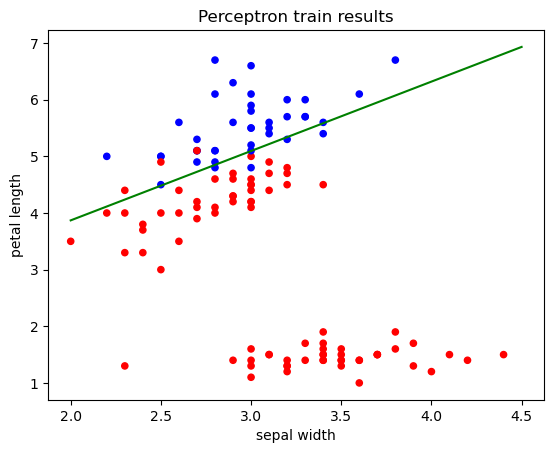

In [31]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_train.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_train])
ax.set_title("Perceptron train results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(perc.bias + perc.weights.iloc[0] * x1) / perc.weights.iloc[1]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

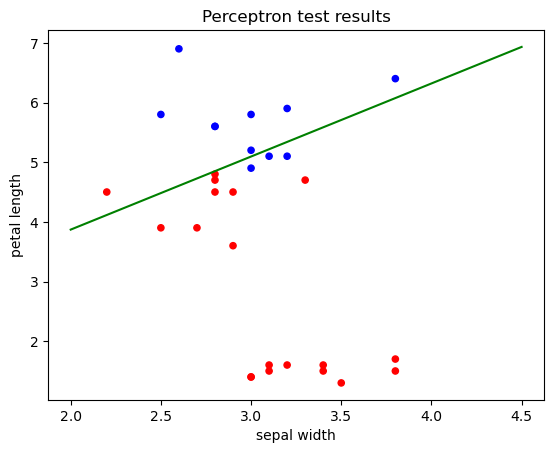

In [32]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_test.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_test])
ax.set_title("Perceptron test results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(perc.bias + perc.weights.iloc[0] * x1) / perc.weights.iloc[1]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
This is a nonseparable case, so the model tries to find the best separating line, but the ideal one cannot be found.
</div>

#### Logistic regression

In [33]:
logreg = Logistic_Regression(max_iter=30)
logreg.fit(X_train, y_train)

Solution found after 7 iterations.


In [34]:
logreg.weights

array([-28.18358554,  -3.662421  ,   7.95064735])

In [35]:
logreg_empirical_error = mean_squared_error(logreg.predict(X_train), y_train)
logreg_generalization_error = mean_squared_error(logreg.predict(X_test), y_test)
print("Logistic regression empirical error:", logreg_empirical_error)
print("Logistic regression generalization error:", logreg_generalization_error)

Logistic regression empirical error: 0.2
Logistic regression generalization error: 0.13333333333333333


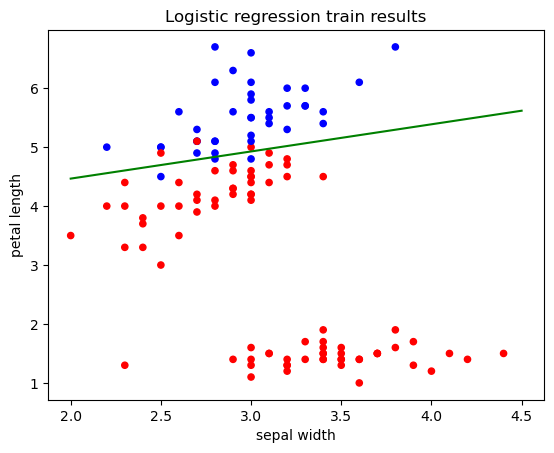

In [36]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_train.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_train])
ax.set_title("Logistic regression train results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(logreg.weights[0] + logreg.weights[1] * x1) / logreg.weights[2]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

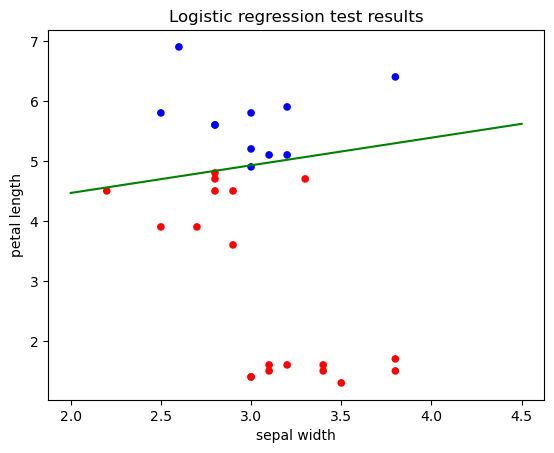

In [37]:
%matplotlib inline

col = {-1: "r", 1: "b"}
ax = X_test.plot.scatter(x="sepal width", y="petal length", c=[col[e] for e in y_test])
ax.set_title("Logistic regression test results")

x1 = np.linspace(2, 4.5, 10)
def f(x1):
    return -(logreg.weights[0] + logreg.weights[1] * x1) / logreg.weights[2]
    
ax.plot(x1, f(x1), color='green', linestyle='-', label='Boundary function')
plt.show()

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
This is a nonseparable case, so the model tries to find the best separating line, but the ideal one cannot be found.
</div>

### Question 8

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
For each training sample $(x_i, t_i)$, the Perceptron performs:
$$
w \leftarrow w + t_i x_i \qquad \text{(only if misclassified)}
$$
The cost of computing $w^\top x_i$ is $O(d)$, where $d$ is the number of features.  
In the worst case, the algorithm checks all $m$ samples:

$$
\boxed{\text{Time per iteration: } O(md)}
$$
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
  
In Logistic Regression (LR), each step computes:
$$
g = X^\top (y - \hat{y}) \qquad \text{(gradient)}
$$
$$
H = X^\top R X \qquad \text{(Hessian)}
$$
where $R$ is a diagonal matrix of size $m \times m$.

- Computing the gradient costs $O(md)$.
- Forming the Hessian costs $O(md^2)$.
- Solving the linear system $H \Delta w = g$ costs $O(d^3)$.

Thus, the total time per LR step is:
$$
\boxed{\text{Time per iteration: } O(md^2 + d^3)}
$$
</div>

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
  
The Perceptron update is significantly cheaper:
$$
O(md) \quad \text{vs.} \quad O(md^2 + d^3)
$$
Logistic regression is therefore much more computationally expensive per iteration, mainly due to the Hessian computation and matrix inversion (or linear solve).
</div>

### Question 9

In [38]:
train_data = pd.read_csv("eggyoke_traindata.csv")
X_train = train_data[["x_1", "x_2"]]
y_train = train_data[["y"]]

In [39]:
test_data = pd.read_csv("eggyoke_testdata.csv")
X_test = test_data[["x_1", "x_2"]]
y_test = test_data[["y"]]

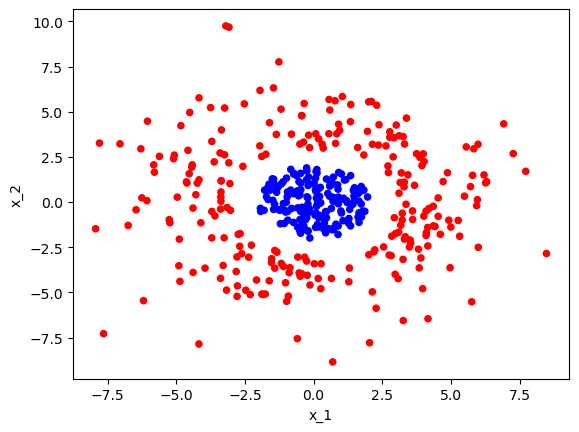

In [40]:
%matplotlib inline
X_concat = pd.concat((X_test, X_train)).reset_index(drop=True)
y_concat = pd.concat((y_test, y_train)).reset_index(drop=True)
col = {-1: "r", 1: "b"}
X_concat.plot.scatter(x='x_1', y='x_2', c=[col[e] for e in y_concat["y"]])
plt.show()

#### Perceptron

#### Logistic regression

<div style="border: 2px solid #4CAF50; padding: 10px; border-radius: 8px; background-color:#f0fff0">
    
The eggyoke dataset is not linearly separable, therefore both the perceptron and logistic regression fail to correctly classify the data.

The perceptron algorithm does not converge and yields a high empirical and generalization error. Logistic regression converges but produces a linear decision boundary that cannot fit the curved structure of the eggyoke classes.

To achieve good performance, we may use a nonlinear classifier or project data into a larger-dimensional space (as was discussed in the lecture) and then use a linear classifier. These approaches allow the model to represent decision boundaries which are nonlinear in the given dimension.
</div>